In [28]:
import pandas as pd
import numpy as np
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from scipy.stats import chisquare
import scipy.stats as st
from scipy.stats import kstest, mannwhitneyu, wilcoxon, chisquare, spearmanr, pearsonr

In [18]:
#Font sizes for figures 
label_fontsize = 15
title_fontsize = 17
tick_size=13

In [26]:
#source code: https://rowannicholls.github.io/python/statistics/agreement/bland_altman.html
def bland_altman_plot(data1, data2, right_coord): 
    x = np.asarray(data1)
    y = np.asarray(data2)
    means = (x + y) / 2
    diffs = x - y
    
    # Average difference (aka the bias)
    bias = np.mean(diffs)
    bias_percent = (diffs)/(means) * 100
    print('Bias percent:', np.mean(bias_percent))
    # Sample standard deviation
    s = np.std(diffs, ddof=1)  # Use ddof=1 to get the sample standard deviation
    
    # Limits of agreement (LOAs)
    upper_loa = bias + 1.96 * s
    lower_loa = bias - 1.96 * s
    
    # Confidence level
    C = 0.95  # 95%
    # Significance level, α
    alpha = 1 - C
    # Number of tails
    tails = 2
    # Quantile (the cumulative probability)
    q = 1 - (alpha / tails)
    # Critical z-score, calculated using the percent-point function (aka the
    # quantile function) of the normal distribution
    z_star = st.norm.ppf(q)

    #print(f'95% of normally distributed data lies within {z_star} σ of the mean')
    
    # Limits of agreement (LOAs)
    loas = (bias - z_star * s, bias + z_star * s)
    #print(f'The limits of agreement are {loas} L/min')
    
    # Limits of agreement (LOAs)
    loas = st.norm.interval(C, bias, s)
    
    # Create plot
    ax = plt.axes()
    plt.rcParams['font.family'] = 'Times New Roman'
    ax.scatter(means, diffs)
    # Plot the zero line
    ax.axhline(y=0, c='grey', lw=0.5)
    # Plot the bias and the limits of agreement
    ax.axhline(y=loas[1], c='grey', ls='--')
    ax.axhline(y=bias, c='grey', ls='--')
    ax.axhline(y=loas[0], c='grey', ls='--')
    # Labels
    #ax.set_title('Bland-Altman Plot', size=17)
    ax.set_xlabel('Mean [$min^{-1}$]', size=14)
    ax.set_ylabel('Difference [$min^{-1}$]', size=14)
    # Get axis limits
    left, right = ax.get_xlim()
    bottom, top = ax.get_ylim()
    # Set y-axis limits
    max_y = max(abs(bottom), abs(top))
    ax.set_ylim(-max_y * 1.1, max_y * 1.1)
    # Set x-axis limits
    domain = right - left
    ax.set_xlim(left, left + domain * 1.1)
    
    # Annotations
    ax.annotate('+LoA', (right_coord, upper_loa), (0, 5), textcoords='offset points', annotation_clip = False, fontsize=13)
    ax.annotate(f'{upper_loa:+0.4f}', (right_coord, upper_loa), (0, -10), textcoords='offset points', annotation_clip = False, fontsize=13)
    ax.annotate('Bias', (right_coord, bias), (0, 5), textcoords='offset pixels', annotation_clip = False, fontsize=13)
    ax.annotate(f'{bias:+0.4f}', (right_coord, bias), (0, -10), textcoords='offset points', annotation_clip = False, fontsize=13)
    ax.annotate('-LoA', (right_coord, lower_loa), (0, 5), textcoords='offset points', annotation_clip = False, fontsize=13)
    ax.annotate(f'{lower_loa:+0.4f}', (right_coord, lower_loa), (0, -10), textcoords='offset points', annotation_clip = False, fontsize=13)

In [4]:
#Load model parameters from ETM 
etm_df = pd.read_csv('H:/data/Results/ETM_resultater_redcap.csv')
etm_df = etm_df.loc[etm_df['voxel_ktrans'] > 0]
etm_df = etm_df[['record_id', 'average_ktrans', 'average_ve', 'average_vp', 'average_kep', 'voxel_ktrans', 'voxel_ve', 'voxel_vp', 'voxel_kep', 'mask', 'average_tumor_volume']]
etm_df['record_id'] = etm_df['record_id'].str.lstrip('GYN ')
etm_df['record_id'] = etm_df['record_id'].str.lstrip('0')
avrg_kt_array = (etm_df['average_ktrans'].to_numpy())*60
voxel_kt_array = (etm_df['voxel_ktrans'].to_numpy())*60
tumor_vol = etm_df['average_tumor_volume'].to_numpy()
avrg_kep_array = (etm_df['average_kep'].to_numpy())*60
avrg_ve_array = etm_df['average_ve'].to_numpy()
avrg_vp_array = etm_df['average_vp'].to_numpy()
voxel_kep_array = (etm_df['voxel_kep'].to_numpy())*60
voxel_ve_array = etm_df['voxel_ve'].to_numpy()
voxel_vp_array = etm_df['voxel_vp'].to_numpy()
etm_df = etm_df.astype(str)

In [7]:
#Kolmogorov-Smirnov to test if the data is normally distributed 
ks_result = kstest(avrg_kt_array, cdf = 'norm')
if ks_result[1] > 0.05: #t-test if the data is normally distributed 
    print(f"K-S statistic: {ks_result[0]}")
    print(f"p-value: {ks_result[1]}")
    t_test = stats.ttest_rel(avrg_kt_array, voxel_kt_array)
    print(t_test)
else: 
    print('Data is not normally distributed')
    print(f"K-S statistic: {ks_result[0]}")
    print(f"p-value: {ks_result[1]}")
    #mann_whitney = mannwhitneyu(np.array(Kt_avrg), np.array(Kt_voxel))
    #print(mann_whitney)
    res  = wilcoxon(avrg_kt_array, voxel_kt_array)
    print('Wilcoxon p-value:', res.pvalue)
    print('Wilcoxon z-statistic:', res.statistic)

Data is not normally distributed
K-S statistic: 0.510289123476975
p-value: 9.676774567718755e-16
Wilcoxon p-value: 1.6296951775896109e-07
Wilcoxon z-statistic: 243.0


In [11]:
#Pearson correlation 
pearson = pearsonr(avrg_kt_array, voxel_kt_array)
print(pearson)

#Spearman correlation 
spearman = spearmanr(avrg_kt_array, voxel_kt_array)
print(spearman)

PearsonRResult(statistic=0.9887100998576797, pvalue=5.317975783236416e-52)
SpearmanrResult(correlation=0.9722062211981566, pvalue=3.5957180307972326e-40)


In [12]:
print(np.median(avrg_kt_array))
print(np.median(voxel_kt_array))

0.16303876554396599
0.170609254288266


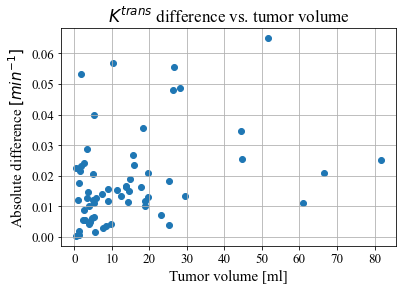

In [13]:
#Plot Kt difference vs. tumor volume
diff = abs(avrg_kt_array-voxel_kt_array)
fig = plt.figure()
plt.rcParams.update({'font.family':'Times New Roman'})
plt.scatter(tumor_vol, diff, color='tab:blue')
plt.xticks(size=tick_size)
plt.yticks(size=tick_size)
plt.xlabel('Tumor volume [ml]', size=label_fontsize)
plt.ylabel('Absolute difference $[min^{-1}]$', size=label_fontsize)
plt.title('$K^{trans}$ difference vs. tumor volume', size=title_fontsize)
#plt.ylim(0,0.05)
plt.grid()
fig.savefig('H:/data/Results/rPACS/ktrans_vs_tumorvol_rPACS.eps', bbox_inches='tight')

Bias percent: -7.001524434342786


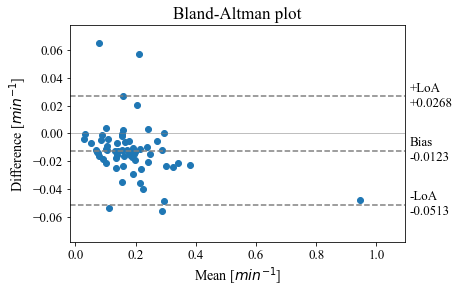

In [29]:
#kt Bland-Altman plot
fig = plt.figure()
bland_altman_plot(avrg_kt_array, voxel_kt_array, 1.11)
plt.xticks(size=tick_size)
plt.yticks(size=tick_size)
plt.title('Bland-Altman plot', size=17)
fig.savefig('H:/data/Results/rPACS/Bland_altman_rPACS.eps', bbox_inches='tight')

In [32]:
#Clinical patient data 
hist_df_og = pd.read_csv('H:/data/master endometrial data/patients.csv')
hist_df = hist_df[['Subj', 'TimeFollowUp', 'StatusFollowUp', 'HistGrade2G']]
hist_df = hist_df.dropna()
hist_df.rename(columns = {'Subj':'record_id'}, inplace = True)
hist_df = hist_df.astype(str)

In [40]:
#Average modeling results 
result_df = pd.merge(etm_df, hist_df, how='inner', on='record_id')
result_Kt = ((result_df['average_ktrans'].astype(float)).to_numpy())*60
result_kep = ((result_df['average_kep'].astype(float)).to_numpy())*60
result_vp = ((result_df['average_vp'].astype(float)).to_numpy())
result_ve = ((result_df['average_ve'].astype(float)).to_numpy())
histgrade = ((result_df['HistGrade2G'].astype(float)).to_numpy())

In [35]:
#Voxelwise modeling results 
result_Kt = ((result_df['voxel_ktrans'].astype(float)).to_numpy())*60
result_kep = ((result_df['voxel_kep'].astype(float)).to_numpy())*60
result_vp = ((result_df['voxel_vp'].astype(float)).to_numpy())
result_ve = ((result_df['voxel_ve'].astype(float)).to_numpy())

In [36]:
#Split Ktrans by median 
median = np.median(result_Kt)

observed_kt = []
for i in result_Kt: 
    if i < median: 
        observed_kt.append(1)
    elif i > median: 
        observed_kt.append(0)

In [37]:
expected_lower = observed_kt.count(0) #Denne verdien er 30
observed_lower =  histgrade.size - np.count_nonzero(histgrade==1) #Denne verdien er 40

expected_upper = observed_kt.count(1) #Denne verdien er 30
observed_upper = np.count_nonzero(histgrade == 1) #Denne verdien er 20

#Chi-square test
chisquare_res = chisquare([[observed_lower,observed_upper], [expected_lower, expected_upper]]) # chisquare([[40,20], [30,30]])
print(chisquare_res)

Power_divergenceResult(statistic=array([1.42857143, 2.        ]), pvalue=array([0.23199772, 0.15729921]))


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


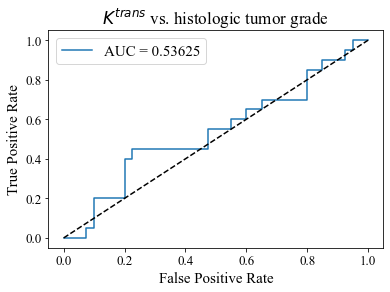

In [43]:
#Plot ROC curve 
fpr, tpr, _ = roc_curve(histgrade, result_Kt)
auc_score = roc_auc_score(histgrade, result_Kt)
plt.rcParams['font.family'] = 'Times New Roman'

label_fontsize = 15
title_fontsize = 17
tick_size=13

plt.plot(fpr, tpr, 'tab:blue', label = f'AUC = {auc_score}')
plt.plot([0, 1], [0, 1], "k--")
plt.legend(fontsize=label_fontsize)
plt.xticks(size=tick_size)
plt.yticks(size=tick_size)
plt.ylabel('True Positive Rate', size=label_fontsize)
plt.xlabel('False Positive Rate', size=label_fontsize)
plt.title('$K^{trans}$ vs. histologic tumor grade', size=title_fontsize)
plt.savefig('H:/data/Results/ROC_kt_histgrade.eps', bbox_inches = 'tight')
plt.show()

In [44]:
#Split by high-risk and low-risk tumor grade 
high_grade = result_df.loc[result_df['HistGrade2G'] == '1']
low_grade = result_df.loc[result_df['HistGrade2G'] == '0']

In [47]:
#High grade values
avrg_kt_high = ((high_grade['average_ktrans'].astype(float)).to_numpy())*60

print('Median Kt:', np.median(avrg_kt_high))
print('Mean Kt:', np.mean(avrg_kt_high), 'Std:', np.std(avrg_kt_high))